In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000L, 2L)

#Test_signal working? - calculated raised cosine

In [4]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()
temp

[['2.00000', '0.99982', ''],
 ['0.69098', '1.00058', ''],
 ['0.19098', '0.99982', ''],
 ['1.80901', '0.99953', ''],
 ['1.30902', '1.00047', ''],
 ['0.00000', '1.00018', ''],
 ['1.30901', '0.99942', ''],
 ['1.80901', '1.00018', ''],
 ['0.19099', '1.00047', ''],
 ['0.69097', '0.99953', ''],
 ['2.00000', '0.99982', ''],
 ['0.69098', '1.00058', ''],
 ['0.19099', '0.99982', ''],
 ['1.80901', '0.99953', ''],
 ['1.30904', '1.00047', ''],
 ['0.00000', '1.00018', ''],
 ['1.30899', '0.99943', ''],
 ['1.80902', '1.00018', ''],
 ['0.19098', '1.00047', ''],
 ['0.69100', '0.99953', ''],
 ['2.00000', '0.99982', ''],
 ['0.69100', '1.00058', ''],
 ['0.19098', '0.99982', ''],
 ['1.80902', '0.99953', ''],
 ['1.30903', '1.00047', ''],
 ['0.00000', '1.00018', ''],
 ['1.30898', '0.99942', ''],
 ['1.80905', '1.00018', ''],
 ['0.19098', '1.00047', ''],
 ['0.69098', '0.99953', ''],
 ['2.00000', '0.99982', ''],
 ['0.69098', '1.00058', ''],
 ['0.19099', '0.99982', ''],
 ['1.80901', '0.99953', ''],
 ['1.30903', '

[['2.00000', '0.99982', ''], ['0.69098', '1.00058', ''], ['0.19098', '0.99982', ''], ['1.80901', '0.99953', ''], ['1.30902', '1.00047', '']]
(2000L, 2L)


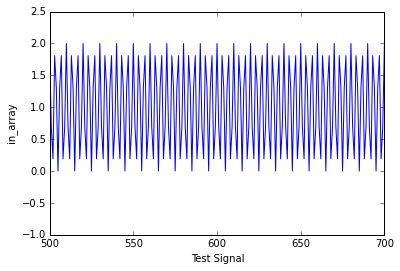

In [5]:
#print(temp.shape)
print(temp[:5])

values1 = np.zeros((n_values, 2))
print(values1.shape)

for i in range(50,n_values,1):
    values1[i,0] = float (temp[i][0])
    values1[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values1[:,0])
#ax.plot(range(n_values), values4[:,1])
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2.5)
ax.set_xlim(500, 700)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test Signal');

Raised cosine test signal appears to be working, but looks awkward because we are sending every 37th value of the test signal along with the output of the low pass filter.

#Let's try the LPF on the calculated raised cosine

In [6]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

[['0.69099', '0.99953', ''], ['2.00000', '0.99982', ''], ['0.69101', '1.00058', ''], ['0.19099', '0.99982', ''], ['1.80901', '0.99953', '']]
(2000L, 2L)


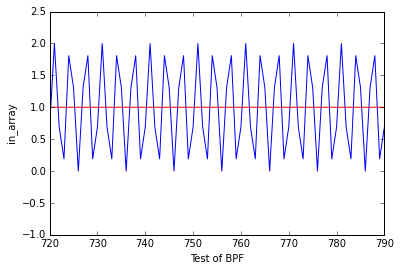

In [7]:
#print(temp.shape)
print(temp[:5])

values2 = np.zeros((n_values, 2))
print(values2.shape)

for i in range(100,n_values,1):
    values2[i,0] = float (temp[i][0])
    values2[i,1] = float (temp[i][1])
   # values4[i,2] = float (temp[i][2])
   # values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values2[:,0])
ax.plot(range(n_values), values2[:,1], 'r')
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2.5)
ax.set_xlim(720, 790)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test of BPF');

The low pass filter passes DC, hence we have a steady 1 volt output. Perfect!

# Let's try LFP on an impulse

In [8]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

[['0.00000', '0.00000', ''], ['0.00000', '0.05518', ''], ['0.00000', '0.00000', ''], ['0.00000', '0.00000', ''], ['0.00000', '0.00000', '']]
(2000L, 2L)


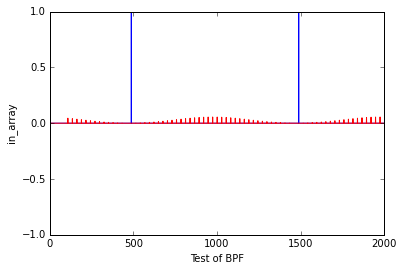

In [10]:
#print(temp.shape)
print(temp[:5])

values2 = np.zeros((n_values, 2))
print(values2.shape)

for i in range(100,n_values,1):
    values2[i,0] = float (temp[i][0])
    values2[i,1] = float (temp[i][1])
   # values4[i,2] = float (temp[i][2])
   # values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values2[:,0])
ax.plot(range(n_values), values2[:,1], 'r')
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 1)
#ax.set_xlim(720, 790)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test of BPF');

Perfect! We see the filtered signal to resemble the low pass filter coefficients, as it should for an impulse response.

# Let's try the LUT raised cosine

In [11]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

[['4100.00000', '2049.23437', ''], ['1416.00000', '2050.78296', ''], ['391.00000', '2049.23437', ''], ['3708.00000', '2048.64282', ''], ['2683.00000', '2050.55688', '']]
(2000L, 2L)


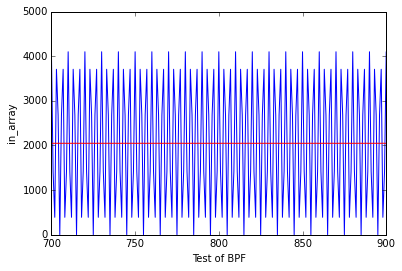

In [14]:
#print(temp.shape)
print(temp[:5])

values2 = np.zeros((n_values, 2))
print(values2.shape)

for i in range(100,n_values,1):
    values2[i,0] = float (temp[i][0])
    values2[i,1] = float (temp[i][1])
   # values4[i,2] = float (temp[i][2])
   # values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values2[:,0])
ax.plot(range(n_values), values2[:,1], 'r')
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 5000)
ax.set_xlim(700, 900)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test of BPF');

Perfect! The sinusoid looks strange, again because we are sending every 37th value of the test signal. The LPF outputs signal at the DC component of the sinusoid.

#Let's try the Rectangular pulse

In [16]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

[['1.00000', '1.00000', ''], ['1.00000', '1.00000', ''], ['1.00000', '1.00000', ''], ['1.00000', '1.00000', ''], ['1.00000', '1.00000', '']]
(2000L, 2L)


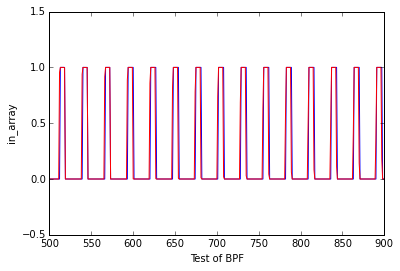

In [21]:
#print(temp.shape)
print(temp[:5])

values2 = np.zeros((n_values, 2))
print(values2.shape)

for i in range(100,n_values,1):
    values2[i,0] = float (temp[i][0])
    values2[i,1] = float (temp[i][1])
   # values4[i,2] = float (temp[i][2])
   # values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values2[:,0])
ax.plot(range(n_values), values2[:,1], 'r')
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-.5, 1.5)
ax.set_xlim(500, 900)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test of BPF');

The low pass filter passes all of the test signal.

#Let's try the rectangular modulation of a raised cosine

In [22]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

[['0.00000', '0.00000', ''], ['0.00000', '0.00000', ''], ['0.00000', '0.00000', ''], ['0.00000', '0.00000', ''], ['0.00000', '0.00000', '']]
(2000L, 2L)


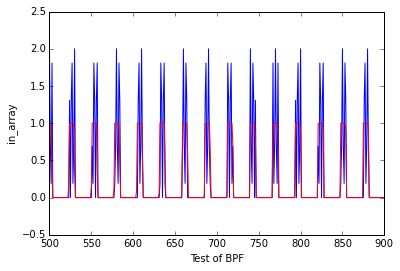

In [26]:
#print(temp.shape)
print(temp[:5])

values2 = np.zeros((n_values, 2))
print(values2.shape)

for i in range(100,n_values,1):
    values2[i,0] = float (temp[i][0])
    values2[i,1] = float (temp[i][1])
   # values4[i,2] = float (temp[i][2])
   # values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values2[:,0])
ax.plot(range(n_values), values2[:,1], 'r')
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-.5, 2.5)
ax.set_xlim(500, 900)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test of BPF');

Perfect! Passes DC component.

#Let's test the Gaussian modulation of raised cosine

In [27]:
teensy = serial.Serial('COM7', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

[['0.01601', '0.03435', ''], ['0.00954', '0.07072', ''], ['0.17857', '0.13376', ''], ['0.23385', '0.23182', ''], ['0.00000', '0.36736', '']]
(2000L, 2L)


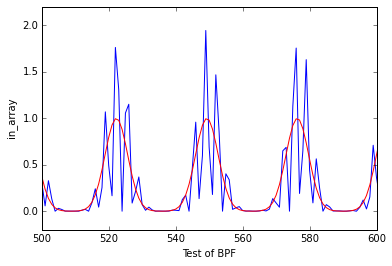

In [29]:
#print(temp.shape)
print(temp[:5])

values2 = np.zeros((n_values, 2))
print(values2.shape)

for i in range(100,n_values,1):
    values2[i,0] = float (temp[i][0])
    values2[i,1] = float (temp[i][1])
   # values4[i,2] = float (temp[i][2])
   # values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values2[:,0])
ax.plot(range(n_values), values2[:,1], 'r')
#.plot(range(n_values), values4[:,2], 'k')
# ax2 = ax.twinx()
# ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-.2, 2.2)
ax.set_xlim(500, 600)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax.set_xlabel('Test of BPF');

Looks good!